Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import pickle


In [ ]:
# Start total execution time
start_time = time.time()

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Data analysis
print(diabetes_dataset.head())
print(diabetes_dataset.describe())
print(diabetes_dataset['diabetes'].value_counts())

  gender   age  hypertension  heart_disease smoking_history    bmi  \
0      0  80.0             0              1           never  25.19   
1      0  54.0             0              0         No Info  27.32   
2      1  28.0             0              0           never  27.32   
3      0  36.0             0              0         current  23.45   
4      1  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.08000

In [ ]:
# Drop the gender column
diabetes_dataset.drop(columns='gender', inplace=True)

In [ ]:
# Mapping smoking history to integers
diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'former': 2,
    'current': 3
})


In [ ]:
# Check for NaN values and drop rows with any NaN values
diabetes_dataset.dropna(inplace=True)

In [ ]:
# number of coloums and rows in this dataset
diabetes_dataset.shape

(89549, 8)

In [ ]:
# Separate data and labels
X = diabetes_dataset.drop(columns='diabetes', axis=1)
Y = diabetes_dataset['diabetes']

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
print(X)

        age  hypertension  heart_disease  smoking_history    bmi  HbA1c_level  \
0      80.0             0              1              0.0  25.19          6.6   
1      54.0             0              0              1.0  27.32          6.6   
2      28.0             0              0              0.0  27.32          5.7   
3      36.0             0              0              3.0  23.45          5.0   
4      76.0             1              1              3.0  20.14          4.8   
...     ...           ...            ...              ...    ...          ...   
99995  80.0             0              0              1.0  27.32          6.2   
99996   2.0             0              0              1.0  17.37          6.5   
99997  66.0             0              0              2.0  27.83          5.7   
99998  24.0             0              0              0.0  35.42          4.0   
99999  57.0             0              0              3.0  22.43          6.6   

       blood_glucose_level 

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 89549, dtype: int64


Train Test Split

In [ ]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(89549, 7) (71639, 7) (17910, 7)


Training the Model

In [ ]:
X_train, X_test , Y_train , Y_test= train_test_split(X,Y, test_size=0.2, random_state=41)
print(X_train.head())


        age  hypertension  heart_disease  smoking_history    bmi  HbA1c_level  \
49136  47.0             0              0              2.0  27.40          6.2   
69084  37.0             0              0              0.0  30.36          6.6   
2341   38.0             0              0              0.0  27.32          4.8   
61819  33.0             0              0              2.0  31.40          5.7   
64801  64.0             0              0              0.0  32.01          6.0   

       blood_glucose_level  
49136                   80  
69084                  126  
2341                   140  
61819                   80  
64801                   85  


Model Evaluation

In [ ]:
# Model evaluation
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

Accuracy Score

In [ ]:
# Print the accuracy scores
print(f'Accuracy score of the training data: {training_data_accuracy * 100:.2f}%')
print(f'Accuracy score of the test data: {test_data_accuracy * 100:.2f}%')


Accuracy score of the training data: 90.53%
Accuracy score of the test data: 90.16%


End Time

In [ ]:
# End total execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.4f} seconds")

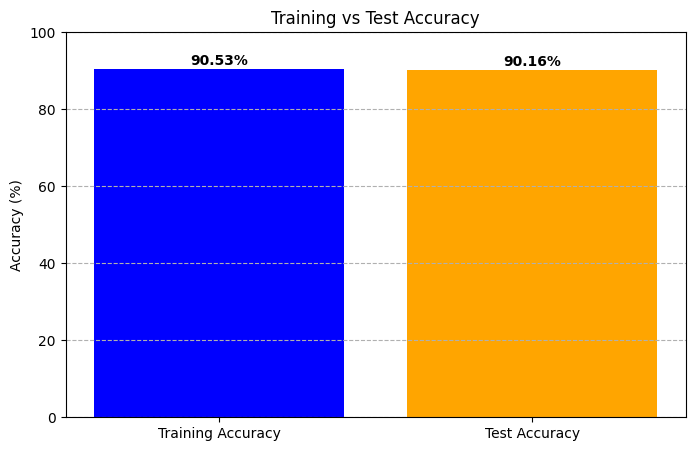

In [ ]:
# Plotting accuracies (optional)
accuracies = [training_data_accuracy * 100, test_data_accuracy * 100]
labels = ['Training Accuracy', 'Test Accuracy']

# Uncomment if you want to visualize the accuracies
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy')
plt.grid(axis='y', linestyle='--')

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

Making a Predictive System


In [ ]:
# Making a predictive system
input_data = (80, 0, 1, 0, 25.19, 6.6, 140)  # Example input
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

In [ ]:
# Prediction
prediction = classifier.predict(input_data_as_numpy_array)

if prediction[0] == 0:
    result = 'The person is not diabetic'
else:
    result = 'The person is diabetic'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


For Saving the Model


In [ ]:
# Saving the trained model
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# End total execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.4f} seconds")

# Print feature names
for column in X.columns:
    print(column)

Total execution time: 0.7234 seconds
age
hypertension
heart_disease
smoking_history
bmi
HbA1c_level
blood_glucose_level


Saving the trained model